In [1]:
!pip install torch torchvision matplotlib --quiet

In [2]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

PyTorch version: 2.8.0+cu126
CUDA available: False


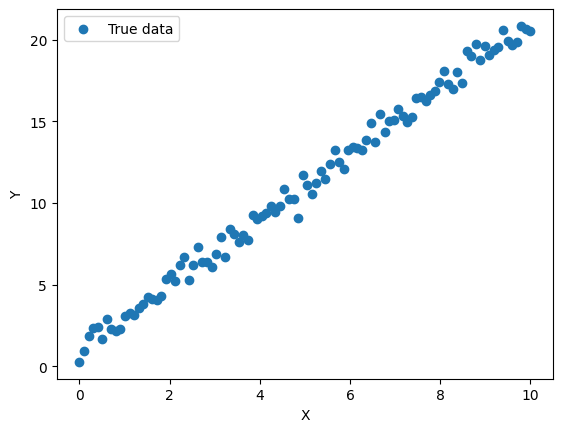

In [3]:
import torch
import matplotlib.pyplot as plt

# 1️⃣ Create input data (X)
X = torch.linspace(0, 10, 100).reshape(-1, 1)  # 100 points from 0 to 10
# 2️⃣ Create target output with a bit of random noise
Y = 2 * X + 1 + 0.5 * torch.randn(X.size())

# 3️⃣ Visualize the data
plt.scatter(X.numpy(), Y.numpy(), label='True data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [4]:
# 4️⃣ Initialize weights (w) and bias (b)
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print(f"Initial w: {w.item():.4f}, b: {b.item():.4f}")

Initial w: -0.4634, b: 0.2575


In [5]:
# 5️⃣ Set hyperparameters
learning_rate = 0.01
epochs = 200

# 6️⃣ Training loop
for epoch in range(epochs):
    # Forward pass: compute predictions
    y_pred = w * X + b

    # Compute loss (Mean Squared Error)
    loss = torch.mean((Y - y_pred) ** 2)

    # Backward pass: compute gradients
    loss.backward()

    # Update parameters (manually, using gradients)
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # Reset gradients for next iteration
    w.grad.zero_()
    b.grad.zero_()

    # Print progress occasionally
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}: w={w.item():.4f}, b={b.item():.4f}, loss={loss.item():.4f}")

Epoch 20: w=2.0619, b=0.6736, loss=0.3017
Epoch 40: w=2.0571, b=0.7059, loss=0.2963
Epoch 60: w=2.0527, b=0.7350, loss=0.2919
Epoch 80: w=2.0487, b=0.7615, loss=0.2883
Epoch 100: w=2.0451, b=0.7854, loss=0.2854
Epoch 120: w=2.0419, b=0.8071, loss=0.2830
Epoch 140: w=2.0389, b=0.8267, loss=0.2810
Epoch 160: w=2.0363, b=0.8444, loss=0.2794
Epoch 180: w=2.0338, b=0.8605, loss=0.2780
Epoch 200: w=2.0317, b=0.8750, loss=0.2769


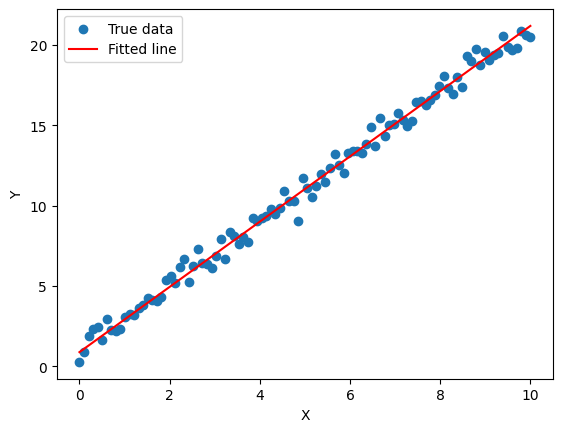


Final parameters: w=2.0317, b=0.8750


In [6]:
# 7️⃣ Plot the final fitted line
predicted = w * X + b

plt.scatter(X.numpy(), Y.numpy(), label='True data')
plt.plot(X.numpy(), predicted.detach().numpy(), color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print(f"\nFinal parameters: w={w.item():.4f}, b={b.item():.4f}")